In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('F:\Course Online\Machine Learning Real World projects in Python\Project5 Stock Price using time series analysis\BAJFINANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
df.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

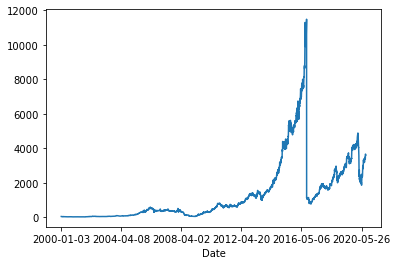

In [5]:
df['VWAP'].plot()

In [6]:
df.shape

(5070, 14)

In [7]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [10]:
df.shape

(2291, 14)

In [11]:
data=df.copy()

In [12]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [13]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [14]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [15]:
for feature in lag_features:
    data[feature+'rolling_mean3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean7']=data[feature].rolling(window=window2).mean()

In [16]:
for feature in lag_features:
    data[feature+'rolling_std3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std7']=data[feature].rolling(window=window2).std()

In [17]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std3,Highrolling_std7,Lowrolling_std3,Lowrolling_std7,Volumerolling_std3,Volumerolling_std7,Turnoverrolling_std3,Turnoverrolling_std7,Tradesrolling_std3,Tradesrolling_std7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [18]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean3', 'Highrolling_mean7',
       'Lowrolling_mean3', 'Lowrolling_mean7', 'Volumerolling_mean3',
       'Volumerolling_mean7', 'Turnoverrolling_mean3', 'Turnoverrolling_mean7',
       'Tradesrolling_mean3', 'Tradesrolling_mean7', 'Highrolling_std3',
       'Highrolling_std7', 'Lowrolling_std3', 'Lowrolling_std7',
       'Volumerolling_std3', 'Volumerolling_std7', 'Turnoverrolling_std3',
       'Turnoverrolling_std7', 'Tradesrolling_std3', 'Tradesrolling_std7'],
      dtype='object')

In [19]:
data.shape

(2291, 34)

In [20]:
data.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                   0
Deliverable Volume       0
%Deliverble              0
Highrolling_mean3        2
Highrolling_mean7        6
Lowrolling_mean3         2
Lowrolling_mean7         6
Volumerolling_mean3      2
Volumerolling_mean7      6
Turnoverrolling_mean3    2
Turnoverrolling_mean7    6
Tradesrolling_mean3      2
Tradesrolling_mean7      6
Highrolling_std3         2
Highrolling_std7         6
Lowrolling_std3          2
Lowrolling_std7          6
Volumerolling_std3       2
Volumerolling_std7       6
Turnoverrolling_std3     2
Turnoverrolling_std7     6
Tradesrolling_std3       2
Tradesrolling_std7       6
dtype: int64

In [21]:
data.dropna(inplace=True)

In [22]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean3', 'Highrolling_mean7',
       'Lowrolling_mean3', 'Lowrolling_mean7', 'Volumerolling_mean3',
       'Volumerolling_mean7', 'Turnoverrolling_mean3', 'Turnoverrolling_mean7',
       'Tradesrolling_mean3', 'Tradesrolling_mean7', 'Highrolling_std3',
       'Highrolling_std7', 'Lowrolling_std3', 'Lowrolling_std7',
       'Volumerolling_std3', 'Volumerolling_std7', 'Turnoverrolling_std3',
       'Turnoverrolling_std7', 'Tradesrolling_std3', 'Tradesrolling_std7'],
      dtype='object')

In [23]:
ind_features=['Highrolling_mean3', 'Highrolling_mean7',
       'Lowrolling_mean3', 'Lowrolling_mean7', 'Volumerolling_mean3',
       'Volumerolling_mean7', 'Turnoverrolling_mean3', 'Turnoverrolling_mean7',
       'Tradesrolling_mean3', 'Tradesrolling_mean7', 'Highrolling_std3',
       'Highrolling_std7', 'Lowrolling_std3', 'Lowrolling_std7',
       'Volumerolling_std3', 'Volumerolling_std7', 'Turnoverrolling_std3',
       'Turnoverrolling_std7', 'Tradesrolling_std3', 'Tradesrolling_std7']

In [24]:
training_data=data[0:1800]
test_data=data[1800:]

In [25]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std3,Highrolling_std7,Lowrolling_std3,Lowrolling_std7,Volumerolling_std3,Volumerolling_std7,Turnoverrolling_std3,Turnoverrolling_std7,Tradesrolling_std3,Tradesrolling_std7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,12.769789,7.494911,15.011107,9.410145,13497.047986,18373.894011,8.665128e+11,1.155773e+12,354.841279,463.942320
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,1.639360,8.227994,13.030765,9.501961,2434.970705,18047.331029,1.579562e+11,1.136003e+12,272.875429,448.020620
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,11.434196,9.497080,7.456597,9.298317,15640.051929,17835.642665,9.982094e+11,1.123423e+12,557.373603,464.778596
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.473593,10.198891,2.002707,9.293713,15088.183102,13139.472184,9.595224e+11,8.397765e+11,656.385050,455.234163
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,3.165833,11.352292,11.643560,11.262712,4575.812970,12469.137006,2.733211e+11,7.983186e+11,150.639747,436.941971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,BAJFINANCE,EQ,2724.05,2724.00,2777.65,2683.50,2748.00,2746.30,2726.23,2606992,...,88.954937,79.489416,83.341306,107.041856,696998.737787,642979.884199,1.827289e+14,1.673270e+14,2794.744413,21708.856675
2018-09-05,BAJFINANCE,EQ,2746.30,2740.15,2764.80,2668.00,2704.45,2716.90,2712.53,1728455,...,63.129081,100.594924,24.113551,119.854378,483305.554092,570427.041296,1.375623e+14,1.467744e+14,21770.352164,17267.163548
2018-09-06,BAJFINANCE,EQ,2716.90,2729.00,2731.50,2671.40,2672.20,2684.10,2695.89,1147879,...,23.818183,113.135709,8.146779,118.187686,734609.476628,584307.816124,2.020435e+14,1.561692e+14,30923.312263,24013.596897


In [26]:
!pip install pmdarima

In [35]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [36]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.519, Time=5.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.213, Time=3.38 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.336, Time=3.54 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.308, Time=4.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=3.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.223, Time=4.53 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 24.752 seconds


In [37]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [39]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [40]:
test_data['forecast_ARIMA']=forecast

<AxesSubplot:xlabel='Date'>

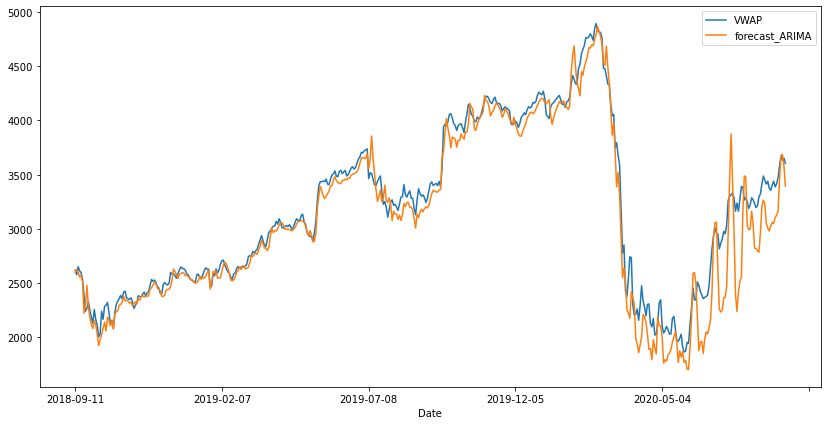

In [43]:
test_data[['VWAP','forecast_ARIMA']].plot(figsize=(14,7))

## Evaluating Model

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['forecast_ARIMA']))

187.69275842116744

In [46]:
mean_absolute_error(test_data['VWAP'],test_data['forecast_ARIMA'])

124.60180745183071